#  **Data Acquisition**


In [ ]:
import pandas as pd
import numpy as np
# Loading the dataset in a DataFrame
df = pd.read_csv("heart_disease.csv")

In [ ]:
# Display the first 5 samples of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Display statistical information of the data (mean, mode, median, etc.)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Display the feature vectors of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Display the shape of the data (samples, features+target)
df.shape

(1025, 14)

This shows that there are 1025 samples, 13 features and 1 target variable.

In [ ]:
# Display basic information of the data (type of variable, non-null count, memory usage, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Data Pre-Processing**


In [ ]:
# Find null or missing values in the data if any
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Find duplicate values in the data if any
df.duplicated().sum()

723

In [ ]:
# Display the duplicate values
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Count unique values in each column
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
# Display unique values of each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex: [1 0]
cp: [0 1 2 3]
trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs: [0 1]

In [ ]:
# Perform Equal Frequency Binning on columns with more than 3 unique continuous values
# Define the columns to be binned

# Create a copy of the data
df_binned = df.copy()

columns_to_bin = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Store bin edges for future reference
bin_edges = {}

# Number of bins
n_bins = 5

# Binning the data
for col in columns_to_bin:
    df_binned[col], quantiles = pd.qcut(df[col], q=n_bins, labels=False, duplicates='drop', retbins=True)
    bin_edges[col] = quantiles
    df_binned[col] = df_binned[col].astype(int)

In [ ]:
df_binned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,0,1,1,0,1,3,0,1,2,2,3,0
1,1,1,0,3,0,1,0,2,1,3,0,0,3,0
2,4,1,0,4,0,0,1,0,1,3,0,0,3,0
3,3,1,0,4,0,0,1,3,0,0,2,1,3,0
4,3,0,0,3,4,1,1,0,0,2,1,3,2,0


In [ ]:
print("Bin ranges:", bin_edges)

Bin ranges: {'age': array([29., 45., 53., 58., 62., 77.]), 'trestbps': array([ 94., 120., 126., 134., 144., 200.]), 'chol': array([126., 204., 229., 254., 286., 564.]), 'thalach': array([ 71. , 129.8, 145. , 158. , 170. , 202. ]), 'oldpeak': array([0. , 0.4, 1.2, 2. , 6.2])}


# Data Pre-processing steps
**Step 1**: We first checked for null or missing values in the dataset. However, no null values were found.

**Step 2**: Next, we checked for duplicate values in the dataset using `df.duplicated()` function. It returned 723 duplicated values. However, upon further inspection, it was noticed that the function returned samples in which only one or two feature values were same. The decision was made to not drop the duplicated values returned by the function as two or more samples can have same feature values (such as same age, same cholestrol level, etc.).

**Step 3**: Bayesian Networks handle discretized data or categories of data better than continuous data as it is easier to generate conditional probability tables for discrete data. Therefore, we use Equal-frequency binning to discretize the feature columns that have more than 4 unique continuous values. We also cast all the feature colummns after binning to int data type to have discrete data values. We also store the bin edges for future use while drawing inferences from the Bayesian Network.

# **Exploratory Data Analysis**



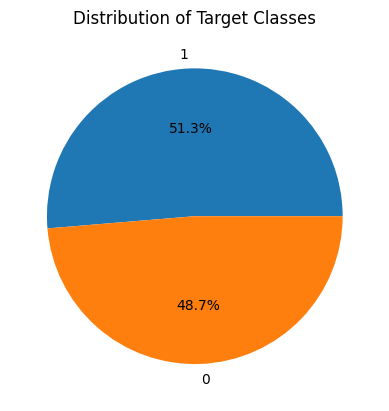

In [ ]:
# Display the different target classes using Pie Chart
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df['target'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Target Classes')
plt.show()

In the dataset given above, the class imbalance is relatively minor with a difference of 2.6% between the target classes. A class imbalance would typically be considered problematic when one class significantly outweighs the other (e.g., 70/30, 80/20, or more). Also, Bayesian Network models are robust to slight imbalance in the dataset as compared to other classification algorithms.


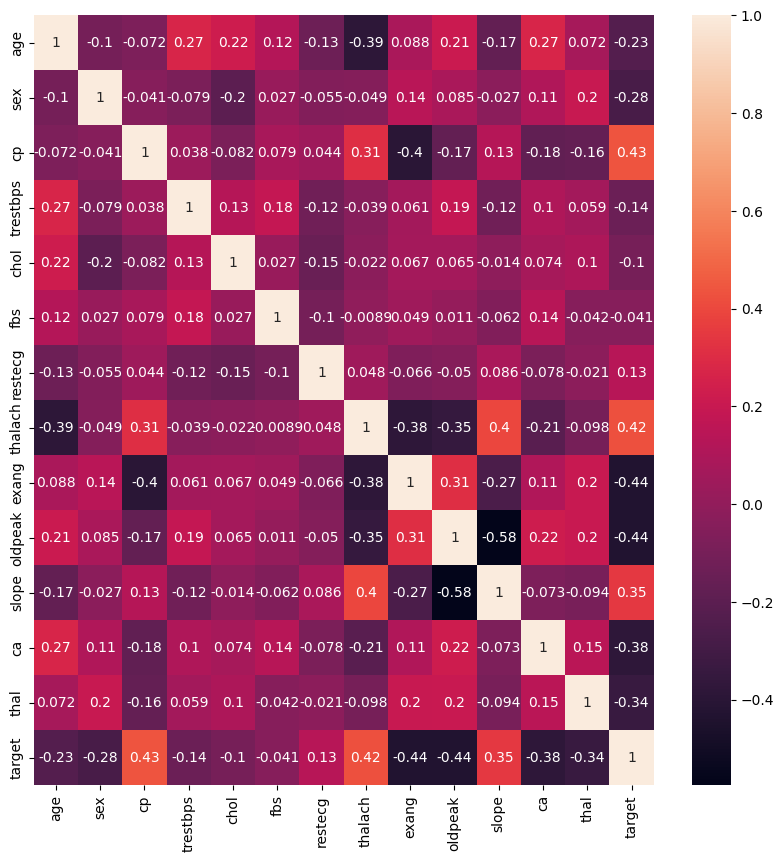

In [ ]:
# Create a heatmap to show correlated features
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In this dataset, we find instances of low to moderate correlation between the features which are less likely to cause issues in most cases.

Including correlated features can lead to increased model complexity without necessarily improving predictive performance, often resulting in overfitting where the model captures noise rather than general patterns. Correlated features can also create redundancy, where the model gives undue importance to certain inputs, distorting their true relationship with the target variable.

In Bayesian Networks specifically, highly correlated features may violate the assumption of conditional independence, reducing the network’s ability to accurately model dependencies. While strong correlations near ±1 can be particularly problematic, moderate correlations like -0.58 found in this dataset does not necessitate removal.

# **Bayesian Network Architecture**



In [ ]:
!pip install pgmpy pandas scikit-learn

In [ ]:
# Construct Bayesian Network Structure defining dependencies between the features and the target
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

model = BayesianNetwork([
    ('age', 'trestbps'),
    ('age', 'chol'),
    ('sex', 'chol'),
    ('age', 'target'),
    ('sex', 'target'),
    ('trestbps','cp'),
    ('cp', 'target'),
    ('oldpeak', 'cp'),
    ('chol', 'target'),
    ('slope','target'),
    ('chol','oldpeak'),
    ('thalach', 'target'),
    ('thalach', 'oldpeak'),
    ('trestbps', 'target'),
    ('fbs', 'target'),
    ('oldpeak','target'),
    ('ca','target'),
    ('chol','ca'),
])


In [ ]:
# Fit the Bayesian Network to the data
model.fit(df_binned, estimator=BayesianEstimator, prior_type="BDeu")

In [ ]:
# Display the Conditional Probability Tables (CPTs)
for node in model.nodes():
    print(f"CPT for {node}:")
    print(model.get_cpds(node))
    print()

CPT for age:
+--------+----------+
| age(0) | 0.207767 |
+--------+----------+
| age(1) | 0.204854 |
+--------+----------+
| age(2) | 0.240777 |
+--------+----------+
| age(3) | 0.147573 |
+--------+----------+
| age(4) | 0.199029 |
+--------+----------+

CPT for trestbps:
+-------------+----------------------+-----+---------------------+---------------------+
| age         | age(0)               | ... | age(3)              | age(4)              |
+-------------+----------------------+-----+---------------------+---------------------+
| trestbps(0) | 0.5056074766355141   | ... | 0.15921052631578947 | 0.2839024390243903  |
+-------------+----------------------+-----+---------------------+---------------------+
| trestbps(1) | 0.0616822429906542   | ... | 0.07368421052631578 | 0.06439024390243903 |
+-------------+----------------------+-----+---------------------+---------------------+
| trestbps(2) | 0.18785046728971963  | ... | 0.19210526315789472 | 0.08878048780487804 |
+-------------

# **Inference in a Bayesian Network (Risk Assssement)**


In [ ]:
# Verify the expected state names for 'age' and 'chol'
print("State names for 'age':", model.get_cpds('age').state_names['age'])
print("State names for 'chol':", model.get_cpds('chol').state_names['chol'])

State names for 'age': [0, 1, 2, 3, 4]
State names for 'chol': [0, 1, 2, 3, 4]


In [ ]:
print(bin_edges['age'])
print(bin_edges['chol'])

[29. 45. 53. 58. 62. 77.]
[126. 204. 229. 254. 286. 564.]


In [ ]:
# Perform inference on the Bayesian Network given age and cholestrol level
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

age_value = 60
chol_value = 260

# Assign bins to the values to draw inference from the network
age_bin = np.digitize(age_value, bin_edges['age']) - 1
chol_bin = np.digitize(chol_value, bin_edges['chol']) - 1



query_result = infer.query(variables=['target'], evidence={'age': age_bin, 'chol': chol_bin})
print("Probability of heart disease given age is 60 and cholestrol level is 260 is: ")
print(query_result)

Probability of heart disease given age is 60 and cholestrol level is 260 is: 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5008 |
+-----------+---------------+
| target(1) |        0.4992 |
+-----------+---------------+


# **Variation of 'age' with fixed cholesterol level to assess heart disease risk**


In [ ]:
# Varying age and keeping cholestrol fixed to check the probability of heart disease
ages = [40, 50, 60, 70]
chol_value = 240

# Assign bins to the values to draw inference from the network
age_bin = {}
for age in ages:
  age_bin[age] = np.digitize(age, bin_edges['age']) - 1

chol_bin = np.digitize(chol_value, bin_edges['chol']) - 1

for age in ages:
    query_result = infer.query(variables=['target'], evidence={'age': age_bin[age], 'chol': chol_bin})
    print(f"Probability of heart disease given age is {age} and cholestrol level is 240 is: ")
    print(query_result)

Probability of heart disease given age is 40 and cholestrol level is 240 is: 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4962 |
+-----------+---------------+
| target(1) |        0.5038 |
+-----------+---------------+
Probability of heart disease given age is 50 and cholestrol level is 240 is: 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5003 |
+-----------+---------------+
| target(1) |        0.4997 |
+-----------+---------------+
Probability of heart disease given age is 60 and cholestrol level is 240 is: 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+
Probability of heart disease given age is 70 and cholestrol level is 240 is: 
+-----------+---------------+
| target    |   phi(target) 

With increasing age, the corresponding cholesterol value of a person should either decrease or remain constant to decrease the risk of a heart disease. This is supported by the results displayed above where with a constant cholestrol value the probability of a heart disease decreases with increasing age. Thus, the inference of the model is correct.

# **Visualizing the Bayesian Network**



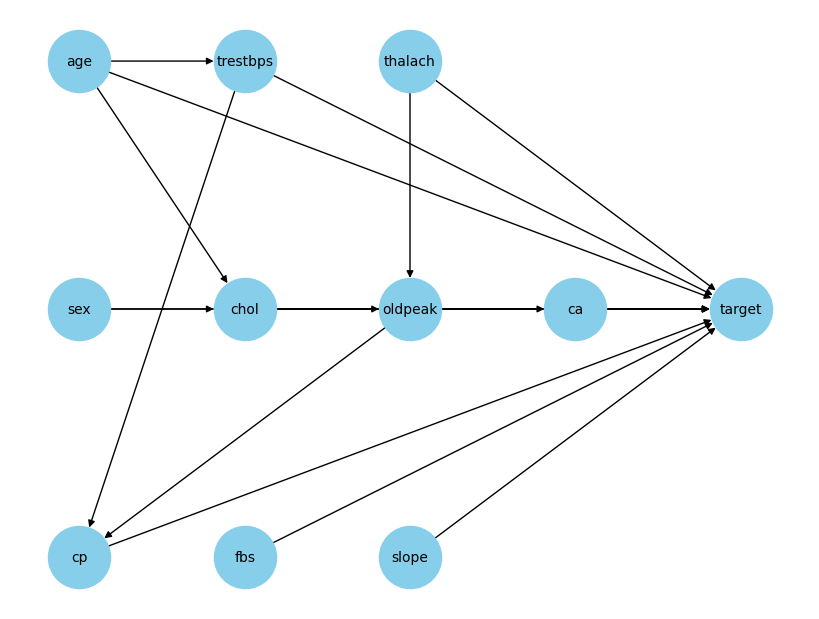

In [ ]:
# Visualize the Bayesian Network
import networkx as nx
import matplotlib.pyplot as plt

# Define the position for each node in the network
pos = {
    'age': (1, 3),
    'sex': (1, 2),
    'cp': (1, 1),
    'trestbps': (2, 3),
    'chol': (2, 2),
    'fbs': (2, 1),
    'thalach': (3, 3),
    'oldpeak': (3, 2),
    'slope': (3, 1),
    'ca': (4, 2),
    'target': (5, 2)
}

# Plotting the graph with the specified positions
plt.figure(figsize=(8, 6))
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', arrowsize=10)
plt.show()


## THE END